In [236]:
!pip install -q kaggle

In [237]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [238]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [239]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Predict whether you will survive or not if you will be on Titanic**

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [241]:
df = pd.read_csv('train.csv')

#**Exploratory Data Analysis**

In [242]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [243]:
df.shape

(891, 12)

In [244]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [246]:
df.apply(lambda x: len(x.unique())) 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [247]:
df.apply(lambda col: col.unique())

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

In [248]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

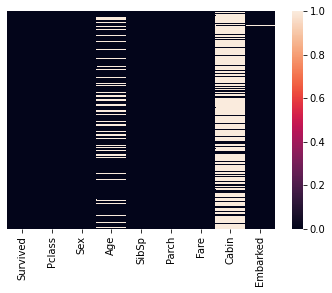

In [249]:
# Check for null values using heatmap 
sns.heatmap(df.isnull(),yticklabels=False)

In [250]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [251]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [252]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [253]:
# Print Unique values
df.apply(lambda col: col.unique())

Survived                                               [0, 1]
Pclass                                              [3, 1, 2]
Sex                                            [male, female]
Age         [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                   [1, 0, 3, 4, 2, 5, 8]
Parch                                   [0, 1, 2, 5, 3, 4, 6]
Fare        [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Embarked                                            [S, C, Q]
dtype: object

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [255]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7b91a22d0>,
      dtype=object)

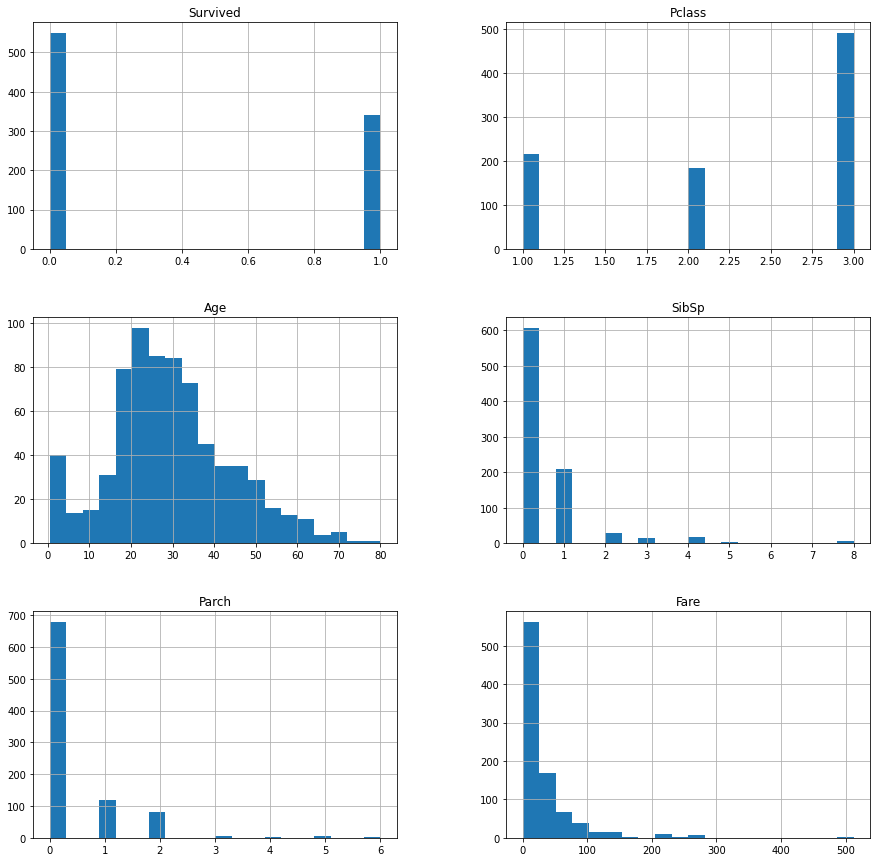

In [256]:
df.hist(bins=20,figsize=(15,15))

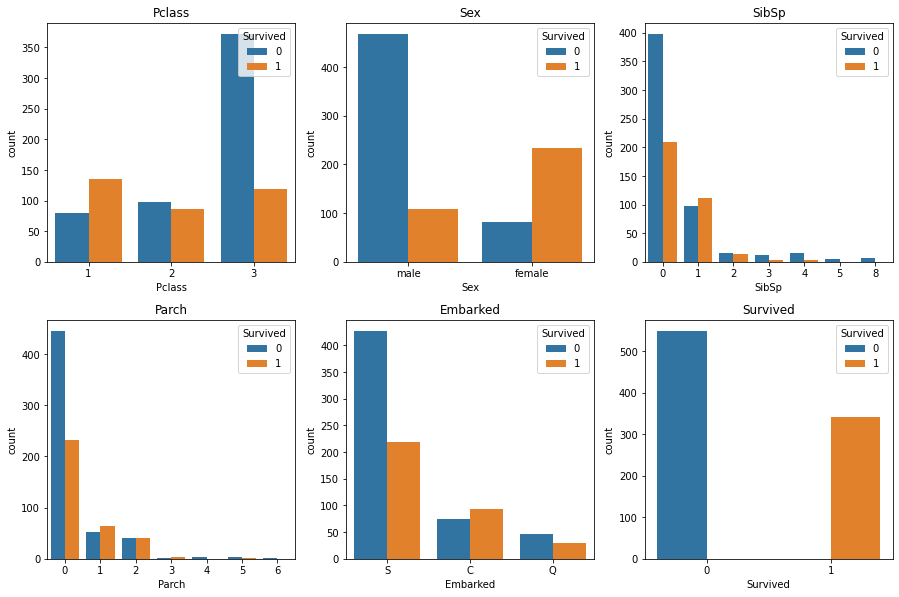

In [257]:
var_bar = ['Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked', 'Survived']

no_rows = 2
no_cols = 3

fig, axs = plt.subplots(no_rows, no_cols, figsize = (no_cols * 4.2,no_rows * 4.2) )

for r in range(0, no_rows):
  for c in range(0, no_cols):
    i = r*no_cols + c 
    ax = axs[r][c]
    sns.countplot(df[var_bar[i]], hue=df['Survived'], ax=ax)
    ax.set_title(var_bar[i])
    ax.legend(title='Survived', loc = 'upper right')

  plt.tight_layout()

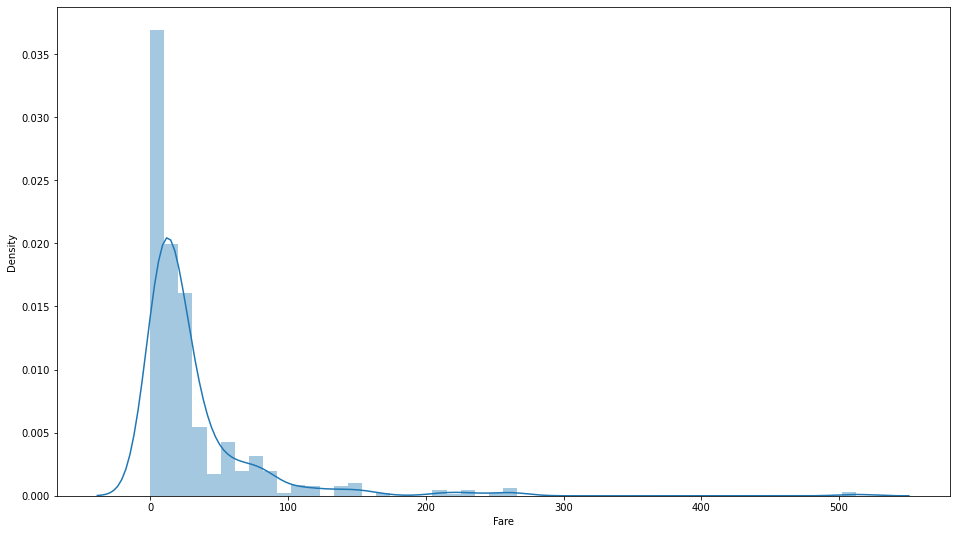

In [258]:
plt.figure(figsize=(16,9))
sns.distplot(df['Fare'])

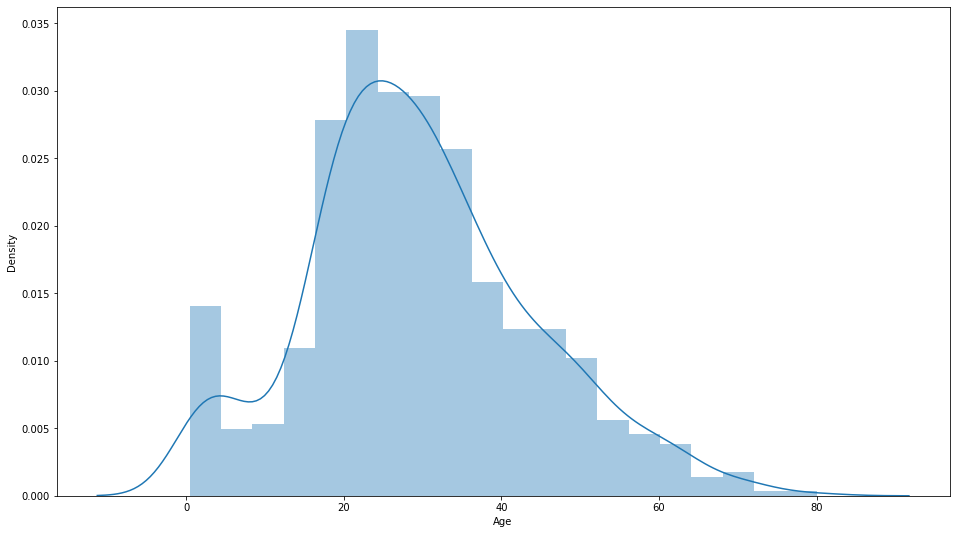

In [259]:
plt.figure(figsize=(16,9))
sns.distplot(df['Age'])

In [260]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])

In [261]:
df['Age'].isnull().sum()

0

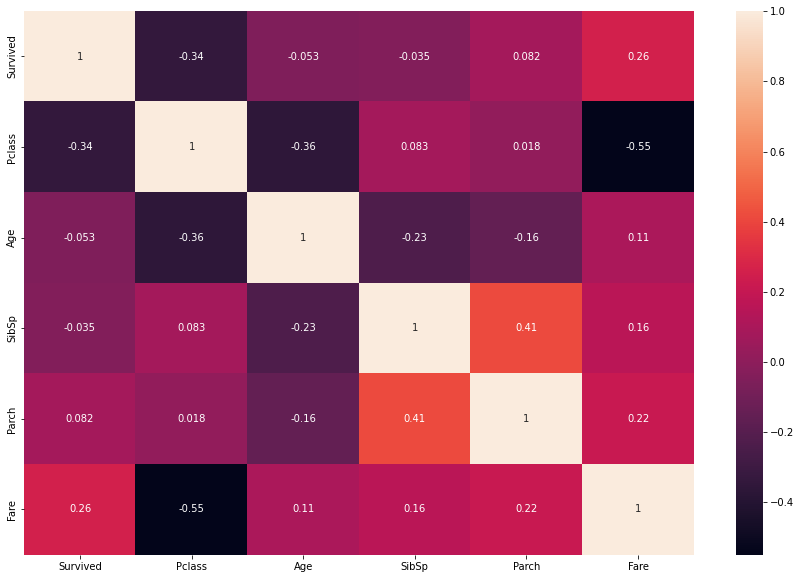

In [262]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [263]:
df_survived = df[df['Survived'] == 1]
df_not_survived = df[df['Survived'] == 0]

print('Total No. of Passengers :',len(df))

print('Total No. of Passengers Not Survived :',len(df_not_survived))
print('Total No. of Passengers Not Survived %:',len(df_not_survived)/len(df) * 100 ,"%")
print('Total No. of Passengers Survived Stayed:',len(df_survived))
print('Total No. of Passengers Survived Stayed %:',len(df_survived)/len(df) * 100 ,"%")

Total No. of Passengers : 891
Total No. of Passengers Not Survived : 549
Total No. of Passengers Not Survived %: 61.61616161616161 %
Total No. of Passengers Survived Stayed: 342
Total No. of Passengers Survived Stayed %: 38.38383838383838 %


In [264]:
df_survived.mean().compare(df_not_survived.mean())

,self,other
Survived,1.000000,0.000000
Pclass,1.950292,2.531876
Age,27.683246,29.117486
SibSp,0.473684,0.553734
Parch,0.464912,0.329690
Fare,48.395408,22.117887


In [265]:
df_survived.mode().compare(df_not_survived.mode())

Survived       Pclass           Sex        Fare      
      self other   self other    self other  self other
0        1     0      1     3  female  male  13.0  8.05

In [266]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [267]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [268]:
from sklearn.preprocessing import LabelEncoder
lencode = LabelEncoder()

# Encoding Sex Column
df['Sex'] = lencode.fit_transform(df['Sex'].values)          

# Encoding Embarked column
df['Embarked'] = lencode.fit_transform(df['Embarked'].values)

In [269]:
df['Sex'].unique()

array([1, 0])

In [270]:
df['Embarked'].unique()

array([2, 0, 1])

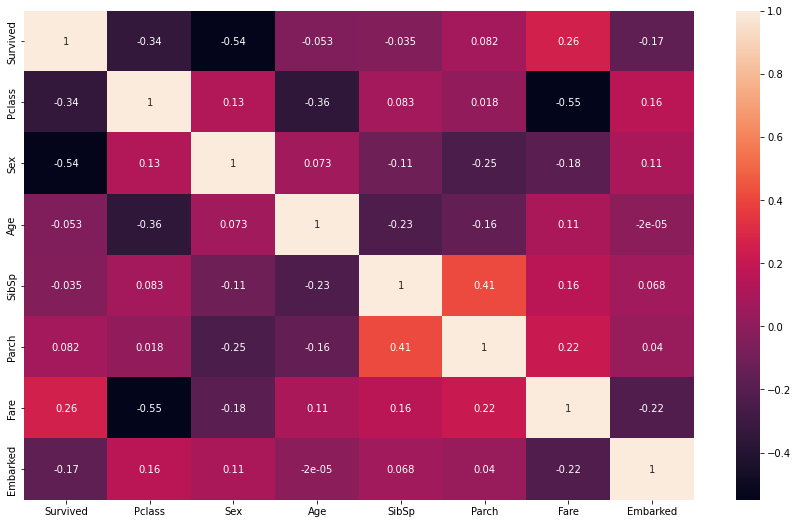

In [271]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

In [272]:
df.groupby('Embarked')[['Survived']].mean()          #0 for c   1 for Q    2 for S 

,Survived
Embarked,
0,0.553571
1,0.389610
2,0.339009


In [273]:
df.groupby('Sex')[['Survived']].mean()         #0 for female  1 for male

,Survived
Sex,
0,0.742038
1,0.188908


In [274]:
df.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [275]:
df.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [276]:
pd.pivot_table(df, index='Survived', values = 'Sex', columns='Pclass')

Pclass,1,2,3
Survived,,,
0,0.962500,0.938144,0.806452
1,0.330882,0.195402,0.394958


In [277]:
age = pd.cut(df['Age'],[0,18,45,60,80])
df.pivot_table('Survived',['Sex',age],'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 45]  0.984127  0.909091  0.500000
    (45, 60]  0.944444  0.857143  0.000000
    (60, 80]  1.000000       NaN  1.000000
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 45]  0.400000  0.090909  0.128114
    (45, 60]  0.333333  0.000000  0.000000
    (60, 80]  0.083333  0.333333  0.000000

In [278]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [279]:
df.apply(lambda col: col.unique())

Survived                                               [0, 1]
Pclass                                              [3, 1, 2]
Sex                                                    [1, 0]
Age         [22.0, 38.0, 26.0, 35.0, 24.0, 54.0, 2.0, 27.0...
SibSp                                   [1, 0, 3, 4, 2, 5, 8]
Parch                                   [0, 1, 2, 5, 3, 4, 6]
Fare        [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Embarked                                            [2, 0, 1]
dtype: object

In [280]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [281]:
cat_cols = df[['Pclass','Sex','Embarked','SibSp','Parch']]
print(cat_cols)

     Pclass  Sex  Embarked  SibSp  Parch
0         3    1         2      1      0
1         1    0         0      1      0
2         3    0         2      0      0
3         1    0         2      1      0
4         3    1         2      0      0
..      ...  ...       ...    ...    ...
886       2    1         2      0      0
887       1    0         2      0      0
888       3    0         2      1      2
889       1    1         0      0      0
890       3    1         1      0      0

[891 rows x 5 columns]


In [282]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_cols = ohe.fit_transform(cat_cols).toarray()

In [283]:
cat_cols.shape

(891, 22)

In [284]:
cat_cols = pd.DataFrame(cat_cols)

In [285]:
cat_cols

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
y = df['Survived']

In [287]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [288]:
df.drop(labels=['Survived','Pclass','Sex','Embarked','SibSp','Parch'] ,axis=1 ,inplace=True)

In [289]:
df

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,24.0,23.4500
889,26.0,30.0000


In [290]:
X = pd.concat([cat_cols,df],axis=1)

In [291]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,13.0000
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,30.0000
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,23.4500
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,30.0000


#**Model Training**

In [292]:
# Split dataset into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [293]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [294]:
# Creating Machine Learning Models

def mlmodels(X_train,y_train):
  
  # Using Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,y_train)

  # Using KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5 )
  knn.fit(X_train, y_train)

  #USing Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(random_state = 0)
  tree.fit(X_train, y_train)

  # Using Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=23, random_state = 0)
  forest.fit(X_train, y_train)

  # Using SVC
  from sklearn import svm
  svc = svm.SVC(kernel='linear')
  svc.fit(X_train, y_train)

  #Printing accuracy
  print('Log_Reg Accuracy : ',log.score(X_train,y_train))
  print("KNN Accuracy : ",knn.score(X_train,y_train))
  print("Dec_Tree Accuracy : ",tree.score(X_train,y_train))
  print("Ran_For Accuracy : ",forest.score(X_train,y_train))
  print("SVC Accuracy : ",svc.score(X_train,y_train))

  return log , knn , tree , forest , svc 

In [295]:
model = mlmodels(X_train , y_train)

Log_Reg Accuracy :  0.8103932584269663
KNN Accuracy :  0.8455056179775281
Dec_Tree Accuracy :  0.9803370786516854
Ran_For Accuracy :  0.9775280898876404
SVC Accuracy :  0.800561797752809


In [296]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

for i in range( len(model) ):
  cm = confusion_matrix(y_test,model[i].predict(X_test))

  TN, FP, FN, TP = confusion_matrix(y_test,model[i].predict(X_test)).ravel() 

  accuracy_score = ( TP + TN ) / ( TP + TN + FN + FP )

  cros_score = cross_val_score(model[i], X, y, cv=5)

  print(cm)
  print('Model[{}] Testing  Accuracy  = "{}"'.format(i,accuracy_score))
  print('Model[{}] Cross Validation  = "{}"'.format(i,cros_score))
  print()

[[95 15]
 [18 51]]
Model[0] Testing  Accuracy  = "0.8156424581005587"
Model[0] Cross Validation  = "[0.80446927 0.79213483 0.79775281 0.79213483 0.80337079]"

[[91 19]
 [22 47]]
Model[1] Testing  Accuracy  = "0.770949720670391"
Model[1] Cross Validation  = "[0.68156425 0.6741573  0.70786517 0.6741573  0.68539326]"

[[95 15]
 [22 47]]
Model[2] Testing  Accuracy  = "0.7932960893854749"
Model[2] Cross Validation  = "[0.77653631 0.78089888 0.80337079 0.76404494 0.78089888]"

[[98 12]
 [17 52]]
Model[3] Testing  Accuracy  = "0.8379888268156425"
Model[3] Cross Validation  = "[0.77653631 0.79213483 0.83707865 0.74719101 0.81460674]"

[[96 14]
 [22 47]]
Model[4] Testing  Accuracy  = "0.7988826815642458"
Model[4] Cross Validation  = "[0.79888268 0.80337079 0.80337079 0.76966292 0.79775281]"



#**Feature Importances**

In [297]:
# get importance
tree = model[3]
importance = tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02819
Feature: 1, Score: 0.01621
Feature: 2, Score: 0.04400
Feature: 3, Score: 0.12714
Feature: 4, Score: 0.17440
Feature: 5, Score: 0.01058
Feature: 6, Score: 0.01189
Feature: 7, Score: 0.01128
Feature: 8, Score: 0.01486
Feature: 9, Score: 0.01248
Feature: 10, Score: 0.00501
Feature: 11, Score: 0.00607
Feature: 12, Score: 0.00641
Feature: 13, Score: 0.00208
Feature: 14, Score: 0.00320
Feature: 15, Score: 0.01820
Feature: 16, Score: 0.00952
Feature: 17, Score: 0.01159
Feature: 18, Score: 0.00100
Feature: 19, Score: 0.00074
Feature: 20, Score: 0.00191
Feature: 21, Score: 0.00044
Feature: 22, Score: 0.24257
Feature: 23, Score: 0.24023


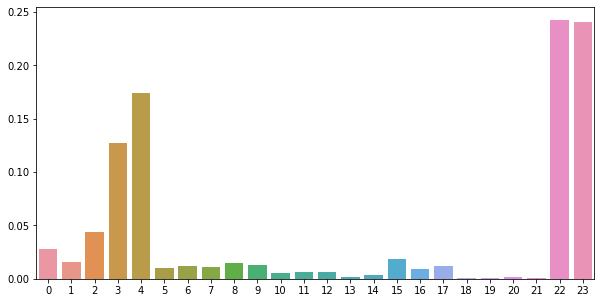

In [298]:
# plot feature importance
plt.figure(figsize=(10,5))
sns.barplot([x for x in range(len(importance))], importance)

In [299]:
X.columns

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,     10,     11,     12,     13,     14,     15,     16,     17,
           18,     19,     20,     21,  'Age', 'Fare'],
      dtype='object')

In [300]:
# Get the Predictions
y_pred = tree.predict(X_test)
print(y_pred,end='\n''\n')
print(y_test.to_numpy())

[0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1]

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


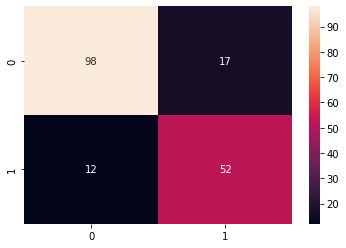

In [301]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

#**Testing & Prediction**

In [302]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [303]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [304]:
test = test.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)

In [311]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [310]:
test.isnull().sum()/len(test)*100

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

In [312]:
test['Age']=test['Age'].fillna(test['Age'].mode()[0])

In [318]:
# Encoding Sex Column
test['Sex'] = lencode.fit_transform(test['Sex'].values)          

# Encoding Embarked column
test['Embarked'] = lencode.fit_transform(test['Embarked'].values)

In [319]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [320]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [321]:
test['Fare']=test['Fare'].fillna(test['Fare'].mode()[0])

In [324]:
test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1


In [346]:
cat_test = test[['Pclass','Sex','SibSp','Parch','Embarked']]

In [337]:
cat_test

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,0,0,1
1,3,0,1,0,2
2,2,1,0,0,1
3,3,1,0,0,2
4,3,0,1,1,2
...,...,...,...,...,...
413,3,1,0,0,2
414,1,0,0,0,0
415,3,1,0,0,2
416,3,1,0,0,2


In [357]:
cat_test = ohe.fit_transform(cat_test).toarray()

In [348]:
cat_test = pd.DataFrame(cat_test)

In [349]:
cat_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [352]:
test.drop(labels=['Pclass','Sex','SibSp','Parch','Embarked'],axis=1,inplace=True)

In [354]:
test = pd.concat([cat_test,test],axis=1)

In [358]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.5,7.8292
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,7.0000
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,62.0,9.6875
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,8.6625
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,8.0500
414,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,108.9000
415,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.5,7.2500
416,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,8.0500


In [360]:
test_pred = tree.predict(test)
test_pred

ValueError: ignored